In [0]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#Importing data
df_ln = pd.read_csv('loan_posts.csv')
df_ln.drop(columns = 'Unnamed: 0', inplace= True)
df_cc = pd.read_csv('credit_card_posts.csv')
df_cc.drop(columns = 'Unnamed: 0', inplace= True)

In [0]:
#Choosing our data to analyze
X_ln = df_ln['text']
X_cc = df_cc['text']

In [0]:
#using count vectorizer to check word frequencies
cvec = CountVectorizer(stop_words = stopwords.words("english"), max_features= 50, token_pattern=r'\b[^\d\W]+\b')
X_ln_cvec = cvec.fit_transform(X_ln)

In [0]:
#New dataframe consisting of frequent words as features and 
X_ln_cvec_df = pd.DataFrame(X_ln_cvec.toarray(),
                   columns=cvec.get_feature_names())
X_ln_cvec_df.head()

,able,account,also,amount,back,com,comments,due,edit,first,food,gas,get,good,help,http,interest,job,know,last,like,loan,loans,looking,make,money,month,need,new,next,paid,pay,payment,paypal,post,proof,provide,r,really,reddit,rent,request,thank,thanks,time,week,willing,work,would,www
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [0]:
#Getting the most occuring words within loan posts 
top_50_loan_features = cvec.get_feature_names()

In [0]:
#using count vectorizer to check word frequencies
cvec = CountVectorizer(stop_words = stopwords.words("english"), max_features= 50, token_pattern=r'\b[^\d\W]+\b')
X_cc_cvec = cvec.fit_transform(X_cc)
#New dataframe consisting of frequent words as features for credit cards 
X_cc_cvec_df = pd.DataFrame(X_cc_cvec.toarray(),
                   columns=cvec.get_feature_names())
X_cc_cvec_df.head()

,able,account,assistance,back,bank,com,comments,company,currently,due,edit,get,go,grant,great,help,http,insurance,interest,job,last,live,loan,loans,make,money,month,need,needed,paid,pay,paycheck,paying,r,really,recently,reddit,rent,school,sent,since,time,tomorrow,want,week,weeks,willing,work,would,www
0,0,1,0,3,0,0,0,3,0,0,1,3,1,0,1,0,0,4,0,0,2,1,0,0,0,4,3,1,0,4,8,2,1,0,0,0,0,2,0,2,1,0,0,0,4,1,0,9,0,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2,0,2,2,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
#Getting the most occuring words within credit card posts
top_50_creditcard_features = cvec.get_feature_names()

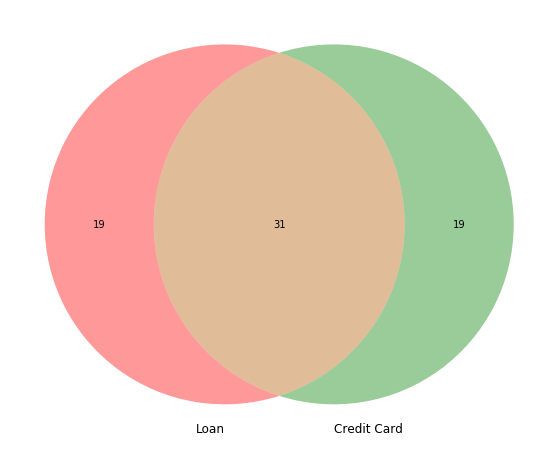

In [0]:
#Plotting a venn diagram to get an intuition of word commonality among the two sub reddits
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3
plt.figure(figsize = (16,8))
venn2([set(top_50_loan_features), set(top_50_creditcard_features)], set_labels=('Loan', 'Credit Card'),  );

###As indicated by the Venn diagram above, 31 words common words were shared among both posts
###However there were 19 words and other unique ones that helped train the model to differentiate posts

In [0]:
#Taking a deeper look on the common words
common_words = [i for i in top_50_loan_features if i in top_50_creditcard_features]
#Getting their respective counts in the loan posts
common_words_count_ln = [np.sum(X_ln_cvec_df[i]) for i in common_words]
#Getting their respective counts in the credit card posts
common_words_count_cc = [np.sum(X_cc_cvec_df[i]) for i in common_words]

In [0]:
#Getting their respective counts in the credit card posts
common_words_count_cc = [np.sum(X_cc_cvec_df[i]) for i in common_words]
dict_cm_wrds_cc = {'word':common_words,
                  'count':common_words_count_cc}
df_cm_wrds_cc = pd.DataFrame(dict_cm_wrds_cc)
df_cm_wrds_cc.sort_values(by = 'count', ascending = False, inplace = True)
df_cm_wrds_cc.head(10)

,word,count
20,pay,1000
28,work,850
2,back,750
7,get,700
16,money,700
13,loan,600
25,time,600
18,need,600
17,month,550
19,paid,500


In [0]:
#Getting their respective counts in the Loan posts
common_words_count_ln = [np.sum(X_ln_cvec_df[i]) for i in common_words]
dict_cm_wrds_ln = {'word':common_words,
                  'count':common_words_count_ln}
df_cm_wrds_ln = pd.DataFrame(dict_cm_wrds_ln)
df_cm_wrds_ln.sort_values(by = 'count', ascending = False, inplace = True)
df_cm_wrds_ln.head(10)

,word,count
20,pay,655
2,back,611
18,need,524
13,loan,496
7,get,459
14,loans,405
29,would,373
19,paid,364
16,money,352
21,r,346


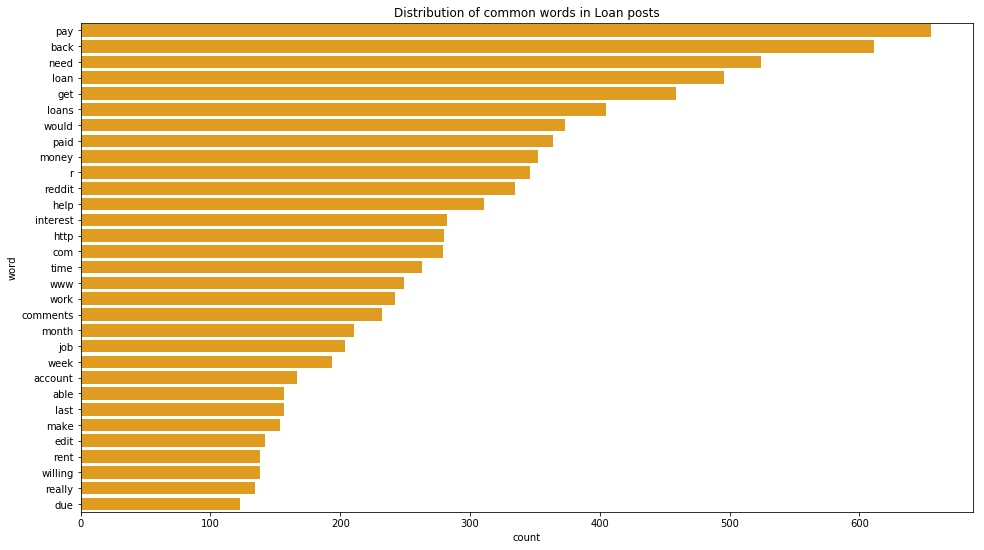

In [0]:
#Plotting the common word occurence in Loan posts
plt.figure(figsize =(16,9))
sns.barplot(data = df_cm_wrds_ln, x = 'count', y ='word', orient = 'h', color = 'orange');
plt.title("Distribution of common words in Loan posts");

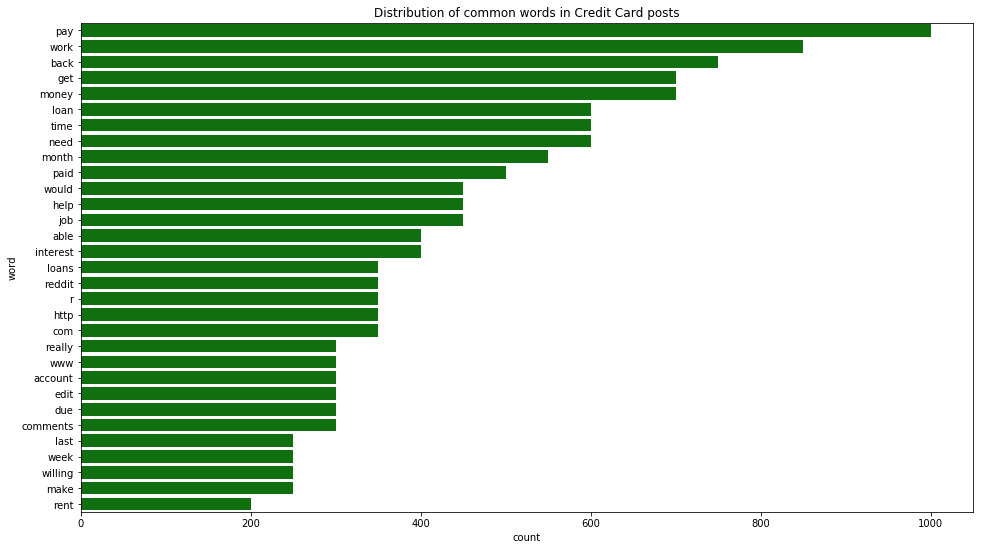

In [0]:
#Plotting the common word occurence in cc posts
plt.figure(figsize =(16,9))
sns.barplot(data = df_cm_wrds_cc, x = 'count', y ='word', orient = 'h', color = 'green')
plt.title("Distribution of common words in Credit Card posts");

In [0]:
#unique words in the loan posts and their counts
unique_words_ln = [word for word in top_50_loan_features if word not in common_words]
unique_words_count_ln = [np.sum(X_ln_cvec_df[i]) for i in unique_words_ln]
dict_unq_wrds_ln = {'word':unique_words_ln,
                  'count':unique_words_count_ln}
df_unq_wrds_ln = pd.DataFrame(dict_unq_wrds_ln)
df_unq_wrds_ln.sort_values(by = 'count', ascending = False, inplace = True)
df_unq_wrds_ln

,word,count
12,paypal,284
18,thanks,224
9,new,189
15,provide,186
17,thank,162
7,like,160
5,good,154
10,next,149
3,food,141
6,know,140


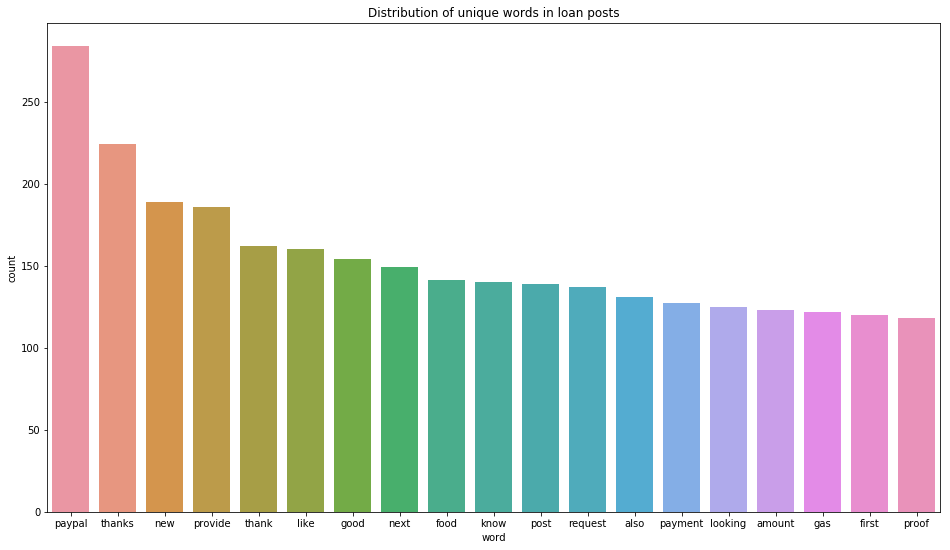

In [0]:
#Plotting the unique word occurence in Loan posts
plt.figure(figsize =(16,9))
sns.barplot(data = df_unq_wrds_ln, x = 'word', y ='count', orient = 'v')
plt.title("Distribution of unique words in loan posts");

In [0]:
#unique words in the credit cards posts and their counts
unique_words_cc = [word for word in top_50_creditcard_features if word not in common_words]
unique_words_count_cc = [np.sum(X_cc_cvec_df[i]) for i in unique_words_cc]
dict_unq_wrds_cc = {'word':unique_words_cc,
                  'count':unique_words_count_cc}
df_unq_wrds_cc = pd.DataFrame(dict_unq_wrds_cc)
df_unq_wrds_cc.sort_values(by = 'count', ascending = False, inplace = True)
df_unq_wrds_cc

,word,count
1,bank,400
13,school,350
0,assistance,300
8,live,300
18,weeks,300
6,great,250
10,paycheck,250
11,paying,250
2,company,250
16,tomorrow,250


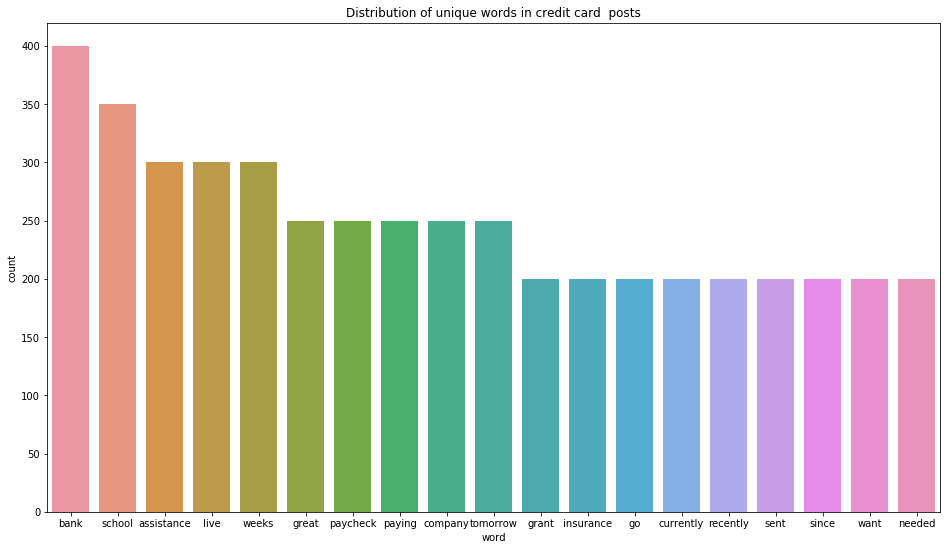

In [0]:
#Plotting the unique word occurence in credit card posts
plt.figure(figsize =(16,9))
sns.barplot(data = df_unq_wrds_cc, x = 'word', y ='count', orient = 'v')
plt.title("Distribution of unique words in credit card  posts");

In [0]:
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Loan words
loan_corpus = ''.join(X_ln)
credit_card_corpus = ''.join(X_cc)

In [0]:
#Cleaned Word list for loan posts
word_list_loan = []
for i in nltk.sent_tokenize(loan_corpus):
  words = nltk.word_tokenize(i)
  for word in words:
    if word.isalpha() and word.lower() not in stopwords.words("english"):
      word_list_loan.append(word)

In [0]:
#Cleaned Word list for credit card posts
word_list_credit_card = []
for i in nltk.sent_tokenize(credit_card_corpus):
  words = nltk.word_tokenize(i)
  for word in words:
    if word.isalpha() and word.lower() not in stopwords.words("english"):
      word_list_credit_card.append(word)

In [0]:
#Define a function to generate wordclouds from a list 
def word_clouder(arr):
  unique_string=(" ").join(arr)
  wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
  # plot the WordCloud image                        
  plt.figure(figsize = (16, 8), facecolor = 'white') 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 

  plt.show()

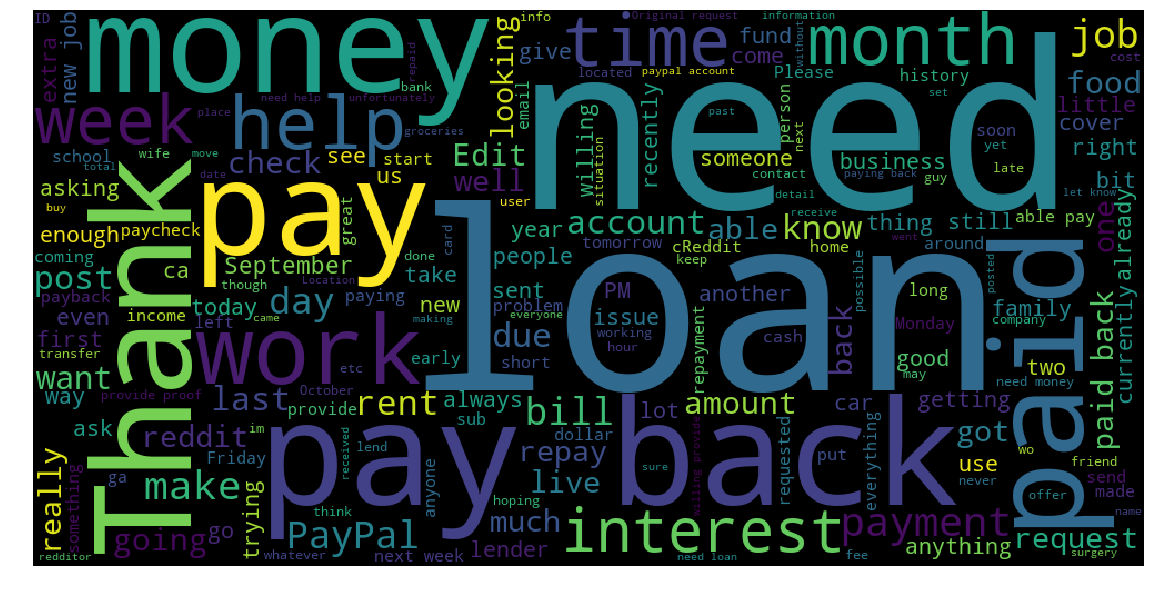

In [0]:
#Wordcloud for loan_posts
word_clouder(word_list_loan)

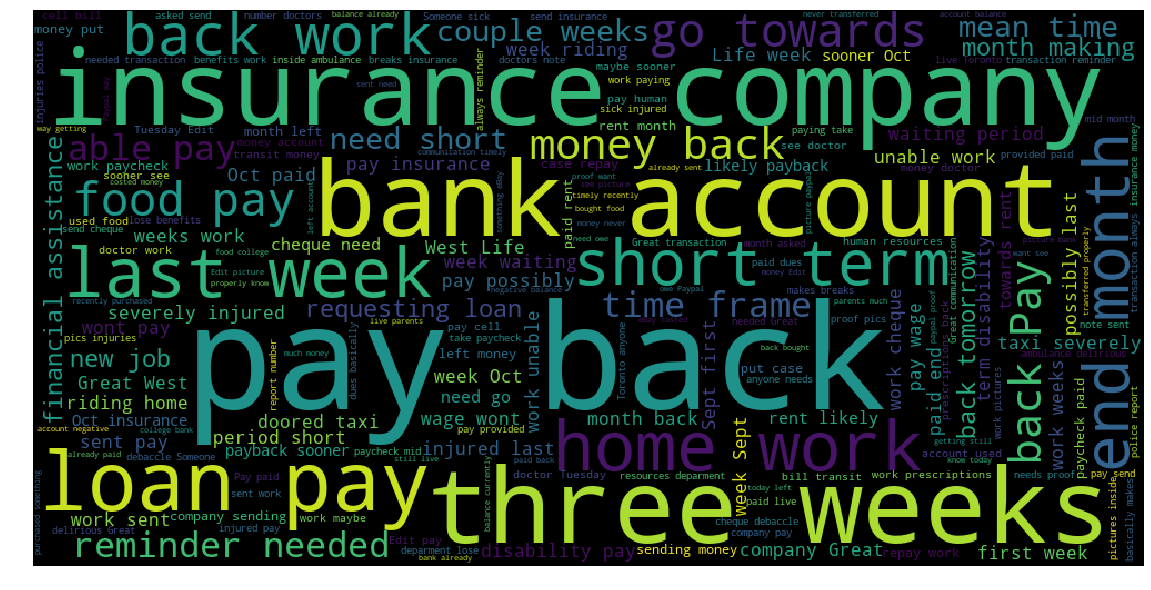

In [0]:
#Wordcloud for credit card posts
word_clouder(word_list_credit_card)